## 다중 회귀
선형 회귀는 하나의 특성을 이용하지만, **다중 회귀(multiple regression)**는 여러개의 특성을 이용해서 선형 회귀 모델을 훈련시킨다

여기서는 농어의 길이 뿐만이 아니라 농어의 두께, 및 높이 데이터도 함께 사용하여 다중 회귀를 진행한다. 또한 농어의 길이 데이터와 높이 데이터를 곱하여 새로운 특성을 만들어 훈련시키는데, 이렇게 기존의 특성을 이용해 새로운 특성을 뽑아내는 작업을 **특성 공학(feature engineering)**이라 한다


## 데이터 준비
인터넷에서 데이터를 다운해서 사용할 수 있는 방법이 있는데, **판다스(pandas)**를 이용하면 된다. 판다스의 핵심 데이터 구조는 **데이터프레임(data frame)**인데 이는 넘파이 배열로 쉽게 변환 가능하다

In [16]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [17]:
# 타깃 데이터
import numpy as np
perch_weight = np.array(
    [  5.9,  32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
)

# 훈련셋과 테스트셋으로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기
특성을 만들거나 전처리하기 위한 클래스를 **변환기(transformer)**라 한다. 모델 클래스에 fit(), score(), predict()가 있는 것처럼 변환기 클래스에는 모두 fit(), transform()이 있다. 참고로 모델 클래스는 추정기(estimator)라고 한다

우리는 sklearn.preprocessing 패키지에 포함된 PolynomialFeatures 클래스를 사용할 것이다. 이 클래스를 사용하는 예제를 살펴보자

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# 2개의 특성 2, 3으로 이루어진 샘플 적용
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]


※ transform 하기 전 fit을 거치는 이유는 사이킷런의 일관된 api로 두 단계로 나누어져있기 때문으로, 크게 이유가 있는 것은 아니다. 두 메서드를 하나로 붙인 fit_transform() 메서드도 있다

fit() 메서드는 새롭게 만들 특성 조합을 찾고, transform() 메서드는 실제로 데이터를 변환한다. 특성 2, 3이 6개로 늘어난 이유는 다음과 같다. 먼저 PolynomialFeatures는 기본적으로 각 특성을 제곱한 항을 추가하고(2^2, 3^2), 특성끼리 서로 곱한 항을 추가한다(2*3). 1이 추가된 이유는 다음 식을 보며 이야기하겠다
$$ 무게 = a \times 길이 + b \times 높이 + c \times 두께 + d \times 1$$
무게는 다음과 같이 결정될 수 있고 a, b, c는 각 특성에 대한 계수이다. 이때 상수로 들어가는 d는 1의 계수라 볼 수 있고, 1은 그 자체로 특성이라 할 수 있다. 따라서 (길이, 높이, 두께, 1)이라는 특성에 대한 계수를 결정하는 문제로 생각할 수 있으므로 특성 중 1이라는 특성은 default다. 그러나 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 특성을 만들 필요가 없다

이에 따라 include_bias=False로 지정하여 1을 없앴다. 사실 이 부분을 지정하지 않아도 절편 항(1)을 무시하므로 문제될 것은 없다

In [19]:
# 위 방법을 train_input에 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
print(poly.get_feature_names_out())

(42, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [20]:
# 테스트셋 변환
test_poly = poly.transform(test_input)

# 훈련
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


In [21]:
# 특성을 더 많이 추가한다면?(5제곱까지 만들어보자)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(42, 55)
0.9999999999991096
-144.40579242335605


특성을 과도하게 늘리면 훈련셋에 오버피팅되어 테스트셋의 점수는 엉망일 수 있음

## 규제
**규제(regularization)**는 모델이 훈련셋에 오버피팅되지 않게 훼방하는 것을 말한다. 선형 회귀 모델인 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이 될 수 있다.

위에서 55개의 특성으로 훈련한 모델의 계수를 규제하여 훈련셋의 점수를 낮추고 테스트셋의 점수를 높여볼건데, 그 전에 특성의 스케일에 대해 생각해보자. 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수값도 차이가 나게 된다(2장 참고). 규제에도 마찬가지로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않을 수 있다. 따라서 규제를 적용하기 전 정규화를 해야 할텐데, 이때 평균과 표준편차를 직접 구해 특성을 표준점수로 바꾸는 것이 아닌 사이킷런에서 제공하는 StandardScaler 클래스를 사용하자(이 클래스도 변환기의 일종이다)

In [22]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
# 테스트셋 변환 시에도 훈련셋으로 학습한 변환기를 사용해야한다
test_scaled = ss.transform(test_poly)

## 릿지 회귀
선형 회귀 모델에 규제를 추가한 모델을 **릿지(ridge)와 라쏘(lasso)**라고 한다. 둘 다 sklearn.linear_model 패키지에 포함되어있다. 여기서 릿지 모델은 규제를 적용할 때 계수를 제곱한 값을 기준으로 규제를 적용한다

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615397


릿지와 라쏘 모델을 사용할 때 규제의 양을 알파(alpha) 값을 조정하여 조절할 수 있다. 모델 객체를 만들 때 알파 매개변수로 규제의 강도를 조절하는데, 알파 값이 커지면 규제 강도가 세져 언더피팅 되도록 유도한다

적절한 알파값을 찾는 방법 중 하나는 알파 값에 대한 R^2 값의 그래프를 그려보는 것이다. 훈련 셋과 테스트셋의 점수가 가장 가까운 지점으로 알파값을 지정하면 된다

알파와 같이 모델이 학습하지 않고 사람이 직접 지정하는 파라미터를 **하이퍼 파라미터(hyper parameter)**라고 한다

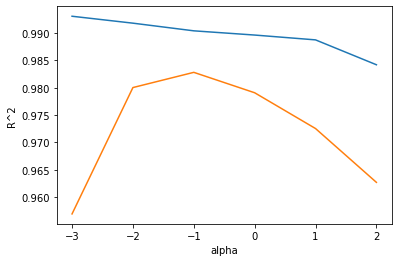

In [24]:
# 맷플롯립 임포트 후 알파 값을 바꿀 때마다 score() 메서드 결과를 저장할 리스트 만들기
import matplotlib.pyplot as plt

train_score = []
test_score = []

# 알파 값을 0.001에서 100까지 10배씩 늘려가며 릿지 모델을 훈련
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)

    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

# 그래프 그리기
# 0.001부터 100까지이므로 로그를 이용해
# 그래프를 보기 좋게 바꾸기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [25]:
# -1에서 훈련셋과 테스트셋의 차이가 가장 적으므로, 즉
# -1에서 오버피팅이 가장 적으므로 최적 알파 값은 0.1
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


## 라쏘 회귀
라쏘 회귀는 계수의 절댓값을 기준으로 규제를 적용한다. 릿지와 같이 계수의 크기를 줄이지만 라쏘에서는 계수를 0으로 만들 가능성도 있다

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.076e+03, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


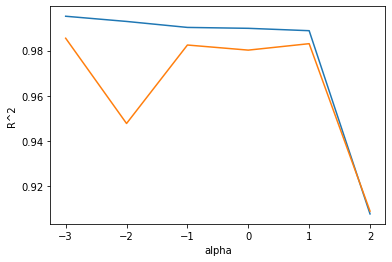

In [35]:
# 릿지와 같이 최적의 알파 값 찾기
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=1000000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [37]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
print(np.sum(lasso.coef_ == 0))

0.9888067471131867
0.9824470598706695
40


위에서 ConvergenceWarning이 뜬 이유는 다음과 같다. 사이킷런의 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이런 경고가 발생한다. 이 반복 횟수를 늘리기 위해 max_iter 매개변수의 값을 충분히 늘려주면 경고가 발생하지 않으나, 위에서는 더 큰 max_iter 값을 지정해줘야 경고가 발생하지 않는다. 또한 1에서 가장 피팅이 잘됐으므로 최종 알파 값은 10으로 지정했다

라쏘 모델은 특정 계수 값을 0으로 만들 수 있다고 했다. 라쏘 모델의 계수는 coef_ 속성에 저장되어있는데 이 중에 0인 것의 개수를 확인해보면 40개의 특성이 사라져 결국 15개의 특성만으로 모델을 훈련했다는 것을 알 수 있다